## imports

In [5]:
%matplotlib inline
from keras.callbacks import History 
history = History()
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [6]:
image_size = 32

In [52]:
from PIL import Image
import os
import numpy as np
from os import listdir
from scipy.misc import imshow
import scipy.misc
from numpy import *
import PIL

size = 32
def preprocess_image(infilename,size):
    data = Image.open(infilename)#.convert('L')
#     data = scipy.misc.imread(infilename, mode = "L")
    data.thumbnail((size,size), Image.ANTIALIAS)
    img = data.resize((image_size,image_size))
    scipy.misc.imsave(infilename, img)
    
def load_image( infilename ) :
#     data = Image.open(infilename)#.convert('L')
    data = scipy.misc.imread(infilename, mode = "L")
#     data.thumbnail((32,32), Image.ANTIALIAS)
#     img = data.resize((image_size,image_size))
#     preprocess_image(infilename,size)
#     data.save(infilename, "JPEG")
    #img = Image.open(infilename)
    #if numberOfColorChannels < 3:
      #  print(infilename)
#     if img.mode != "RGB":
#         img = img.convert('RGB')
#         img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    
    #img.load()
#     scipy.misc.imsave(infilename, img)
    #data = np.asarray(img, dtype="float32" )
    #img.close()
    
    return data

path = ['Dataset/imgflip_images', 'Dataset/greetings_images']#,'Dataset/scanned_documents','Dataset/imp_images']

Y = []
X = []
data = []

for p in path:
    for files in listdir(p):
        #print(files)
        try:
            t = load_image(p+'/'+files)
            X = t
            Y = (float(path.index(p)))
            data.append((X,Y,p+'/'+files))
        except:
            print("error reading file:"+ files)

In [76]:
#Xtemp = np.uint8(X)
import random
import matplotlib.pyplot as plt
random.shuffle(data)

X = []
Y = []
imageNameDict = {}
for d in data:
    X.append(d[0])
    Y.append(d[1])
    imageNameDict[len(X)-1]=d[2]

In [77]:
X[9]

array([[198, 199, 200, ..., 175, 189, 196],
       [203, 204, 204, ..., 174, 187, 194],
       [206, 206, 207, ..., 173, 185, 192],
       ..., 
       [146, 143, 140, ...,  85, 103, 104],
       [148, 142, 137, ..., 103, 120, 115],
       [139, 134, 129, ...,  93, 101,  96]], dtype=uint8)

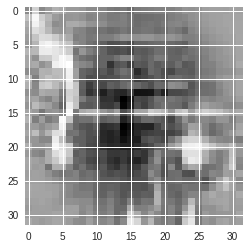

In [78]:
#Xtemp = np.uint8(X)

import matplotlib.pyplot as plt
plt.imshow(np.uint8(X[6]))
plt.show()

In [79]:
Y[6]

1.0

In [80]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
totalSize = len(X)
trainingSize = int(0.8*totalSize)
# load data
X_train = np.array(X[:trainingSize])
y_train = np.array(Y[:trainingSize])
X_test = np.array(X[trainingSize:])
y_test = np.array(Y[trainingSize:])
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, image_size, image_size).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, image_size, image_size).astype('float32')
# normalize inputs from 0-255 to 0-1

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [58]:
# 1 Conv layer
def larger_model(dropout):
    # create model
    model = Sequential()
    model.add(Conv2D(150, (7, 7), input_shape=(1, image_size, image_size), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Conv2D(80, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(dropout))
#     model.add(Conv2D(40, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
# # 2 Conv layers
# def larger_model(dropout):
#     # create model
#     model = Sequential()
#     model.add(Conv2D(150, (7, 7), input_shape=(1, image_size, image_size), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(3, 3)))
# #     model.add(Conv2D(80, (5, 5), activation='relu'))
# #     model.add(MaxPooling2D(pool_size=(2, 2)))
# #     model.add(Dropout(dropout))
#     model.add(Conv2D(80, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(0.3))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(50, activation='relu'))
#     model.add(Dense(num_classes, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [15]:
# # # 3 conv layers
# def larger_model(dropout):
#     # create model
#     model = Sequential()
#     model.add(Conv2D(150, (7, 7), input_shape=(1, image_size, image_size), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(dropout))
#     model.add(Conv2D(80, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(dropout))
#     model.add(Conv2D(40, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Dropout(dropout))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(50, activation='relu'))
#     model.add(Dense(num_classes, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [16]:
print(len(X))
print(X[0].shape)

9412
(32, 32)


In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
dropout = 0.7
model = larger_model(dropout)
# Fit the model
from keras import preprocessing
# For preprocessing
datagen = ImageDataGenerator(featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())


In [20]:
# datagen.fit(X_train)


In [21]:

epochs = 1
#model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test),
 #                   steps_per_epoch=len(X_train) / 32, epochs=epochs,callbacks = [history])
weights_file = 'test.h5'
if not os.path.exists(weights_file):
#     my_model.compile(optimizer = 'adam',loss= 'categorical_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=200, callbacks = [history])
    model.save_weights(weights_file)
else:
    model.load_weights(weights_file)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 7529 samples, validate on 1883 samples
Epoch 1/1
7529/7529 [==============================] - 248s - loss: 0.5633 - acc: 0.7042 - val_loss: 0.4881 - val_acc: 0.7685
Large CNN Error: 23.15%


In [81]:
predict = model.predict(X_test, verbose=1)

1883/1883 [==============================] - 35s    


In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
#model.save_weights(weights_file)

import matplotlib.pyplot as plt
def plot(label1,label2,xlabel,ylabel):
    X_axis = range(1,len(acc)+1)
    plt.plot(X_axis, acc, marker='o', linestyle='-', color='g',label=xlabel)
    plt.plot(X_axis, val_acc, marker='o', linestyle='--', color='r',label=ylabel)
    plt.xlabel(label1)
    plt.ylabel(label2)
    legend = plt.legend(loc='lower right', shadow=True)
    plt.show()

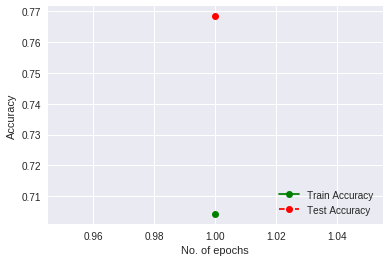

In [83]:
plot('No. of epochs','Accuracy',"Train Accuracy","Test Accuracy")

In [84]:
import numpy as np
predict1 = np.argmax(predict,axis=1)*1.
y_test1 = np.argmax(y_test,axis = 1)*1.
len(predict)

1883

[[ 442  394]
 [  44 1003]]


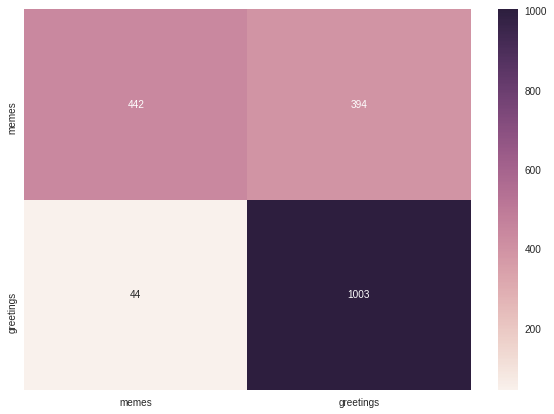

In [85]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test1,predict1)
print(cm)
sn.set()
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(cm, cmap='binary')
pd.options.display.float_format = '{:.2f}'.format

np.set_printoptions(suppress=True)
df_cm = pd.DataFrame(cm, index = [i for i in ["memes",'greetings']],
                  columns = [i for i in ["memes",'greetings']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [86]:
misclassified = np.where(y_test1 != predict1)

In [122]:
misclassified_files = []
for i in misclassified[0]:
    print("backup/"+imageNameDict[i])
    misclassified_files.append("backup/"+imageNameDict[i])

backup/Dataset/greetings_images/etings-2252-8.jpg
backup/Dataset/greetings_images/etings-2315.jpg
backup/Dataset/greetings_images/etings-1136.jpg
backup/Dataset/greetings_images/etings-2006.jpg
backup/Dataset/imgflip_images/i_imgflip_com_706.jpg
backup/Dataset/greetings_images/etings-1125.jpg
backup/Dataset/imgflip_images/i_imgflip_com_665.jpg
backup/Dataset/imgflip_images/w6gvz.jpg
backup/Dataset/greetings_images/etings-1084-12.jpg
backup/Dataset/imgflip_images/1qfudx.jpg
backup/Dataset/imgflip_images/1oego5.jpg
backup/Dataset/imgflip_images/i_imgflip_com_57.jpg
backup/Dataset/imgflip_images/i_imgflip_com_628.jpg
backup/Dataset/greetings_images/etings-4150.jpg
backup/Dataset/imgflip_images/1qcp1j.jpg
backup/Dataset/greetings_images/etings-3317.jpg
backup/Dataset/greetings_images/etings-522.jpg
backup/Dataset/greetings_images/etings-2355.jpg
backup/Dataset/greetings_images/etings-1585.jpg
backup/Dataset/greetings_images/etings-732-0.jpg
backup/Dataset/greetings_images/etings-43.jpg
bac

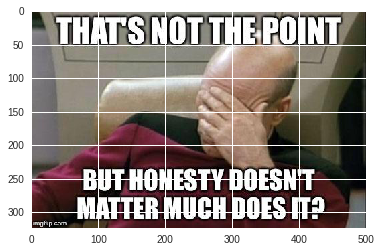

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline  
img = Image.open('backup/Dataset/imgflip_images/1bsq6d.jpg')
plt.imshow(img)
# print("Label:"+ y_test1[int(misclassified[0][0])])

In [120]:
y_test[int(misclassified[0][0])]

array([ 1.,  0.])